In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

In [3]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [4]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [5]:
df.shape

(395547, 8)

In [6]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [12]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


카테고리 별 답변되는 청원, 미답변된 청원

In [13]:
df_answer=df.loc[df['votes']>200000]
df_non=df.loc[df['votes']<200000]

In [14]:
category_answer=pd.DataFrame(df_answer['category'].value_counts()).reset_index()
category_answer.columns=['category','counts']
category_answer

,category,counts
0,인권/성평등,24
1,안전/환경,10
2,기타,8
3,정치개혁,8
4,문화/예술/체육/언론,7
5,반려동물,4
6,외교/통일/국방,4
7,보건복지,3
8,교통/건축/국토,3
9,육아/교육,3


In [15]:
category_non=pd.DataFrame(df_non['category'].value_counts()).reset_index()
category_non.columns=['category','counts']
category_non

,category,counts
0,정치개혁,62742
1,기타,48674
2,인권/성평등,34969
3,안전/환경,30628
4,교통/건축/국토,28181
5,외교/통일/국방,26622
6,육아/교육,25534
7,보건복지,24845
8,일자리,23225
9,행정,20267


답변 대상 청원들 중에서는 인권/성평등, 안전/환경, 정치개혁 순으로 많았고, 답변 대상이 아닌 청원들 가운데에선 정치개혁, 인권/성평등, 안전/환경 순으로 청원이 들어왔다

카테고리별 답변이 되는 비율/순위

In [17]:
answer_non=pd.merge(left=category_answer, right=category_non, how="inner", on="category")
answer_non

,category,counts_x,counts_y
0,인권/성평등,24,34969
1,안전/환경,10,30628
2,기타,8,48674
3,정치개혁,8,62742
4,문화/예술/체육/언론,7,18200
5,반려동물,4,4053
6,외교/통일/국방,4,26622
7,보건복지,3,24845
8,교통/건축/국토,3,28181
9,육아/교육,3,25534


In [18]:
answer_non["rate"]=answer_non["counts_x"]/answer_non["counts_y"]*100
answer_non.sort_values(by="rate", ascending=False)

,category,counts_x,counts_y,rate
5,반려동물,4,4053,0.098692
0,인권/성평등,24,34969,0.068632
4,문화/예술/체육/언론,7,18200,0.038462
1,안전/환경,10,30628,0.032650
10,성장동력,2,7251,0.027582
2,기타,8,48674,0.016436
6,외교/통일/국방,4,26622,0.015025
3,정치개혁,8,62742,0.012751
7,보건복지,3,24845,0.012075
11,경제민주화,2,16791,0.011911


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44428 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from c

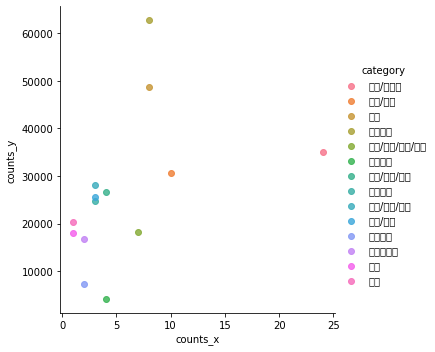

In [19]:
ax = sns.lmplot(x="counts_x", y="counts_y", hue = "category",data = answer_non)

답변된 청원 대비 미답변된 청원의 비율은 일정하지 않고 다음과 같다. 반려동물 관련 청원이 답변되는 비율이 다른 항목에 비해 현저히 높음을 알 수 있다. 반려동물 관련 문제가 사회적 이슈로 잘 대두되고 있음을 알 수 있으며, 인권/성평등 문제 문화/예술/체육 언론, 안전/환경 문제가 그 뒤를 잇는다. 하지만 전반적으로 답변되지 못하는 청원의 수가 답변된 청읜의 수에 비해 현저히 적은 것으로 보아 무의미한 청원의 수가 많다는 것을 알 수 있다.

20만건이 넘었지만 답변을 받지 못한 수

In [21]:
df['answer'] = (df['votes'] > 200000) == 1

In [22]:
df.shape

(395547, 9)

In [23]:
df["answer"]=df["answer"].astype('int')

In [28]:
df["yet"]=df["answer"]-df["answered"]
df["yet"].sum()

51

20만건이 넘은 청원들이 아직 모두 답변되지 않았다.
청와대 청원 투표가 소통의 기능을 하기 위해서는 미답변된 51건에 대한 청원에 빠른 시일 내에 적절한 답을 제시해야 할 것이다.

월별 청원수

In [29]:
df['start_month'] = df['start'].dt.month

In [30]:
df.month=pd.DataFrame(df['start_month'].value_counts()).reset_index()
df.month.columns=['month','counts']
df.month=df.month.sort_values("month", ascending=True)
df.month

<ipython-input-30-cbe3c39ac17d>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.month=pd.DataFrame(df['start_month'].value_counts()).reset_index()


,month,counts
0,1,52941
6,2,28117
11,3,21795
10,4,23227
8,5,25499
9,6,25483
7,7,25714
5,8,28851
2,9,40888
4,10,31687


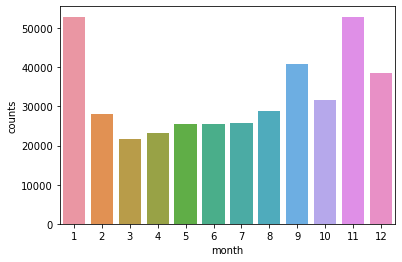

In [31]:
sns.barplot(x = 'month', y= 'counts', data = df.month)

1월, 11월, 9월, 12월에 현저히 많은 수의 청원이 올라왔다.
월별 차이가 큰 것으로 보아 해당하는 달에 큰 사건 및 사고가 있었거나 데이터 수집 기간에 있어 차이가 발생했는지 더 알아볼 필요가 있다.

요일별 청원수

In [32]:
df['start_dow'] = df['start'].dt.dayofweek

In [33]:
df.dow=pd.DataFrame(df['start_dow'].value_counts()).reset_index()
df.dow.columns=['day of the week','counts']
df.dow=df.dow.sort_values("day of the week", ascending=True)
df.dow

<ipython-input-33-951e65ed30d0>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dow=pd.DataFrame(df['start_dow'].value_counts()).reset_index()


,day of the week,counts
4,0,54234
0,1,65229
2,2,61966
1,3,63072
3,4,56646
5,5,50984
6,6,43416


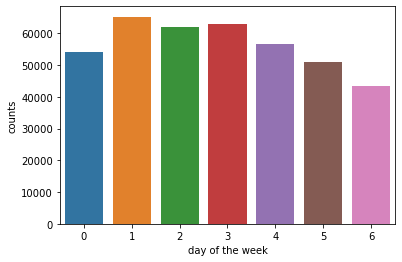

In [34]:
plt.subplots()
sns.barplot(x = 'day of the week', y= 'counts', data = df.dow)
plt.show()

청원은 월요일에 가장 많이 올라왔으며, 토요일에 가장 적게 올라왔다.